In [29]:
import pandas as pd
import numpy as np
#hide warnings
import warnings
warnings.filterwarnings('ignore')
#To display maximum columns of pandas dataframe
pd.set_option('display.max_columns',None)

MATPLOTLIB IS A 2-D LIBRARY THAT HELPS IN VISUALIZING FIGURES. IT IS ROBUST, FREE AND EASY LLIBRARY FOR DATA VISUALIZTION.

A FIGURE CONTAINS THE CANVAS WHERE DATA IS PLOTTED-->
AXES IS A SINGLE PLOT-->
EACH AXES HAS AN X-AXIS AND Y- AXIS-->
WITHIN THE AXES ARE TITLES,TICKS,LABELS, ETC-->
MULTIPLE PLOTS CAN BE CREATED


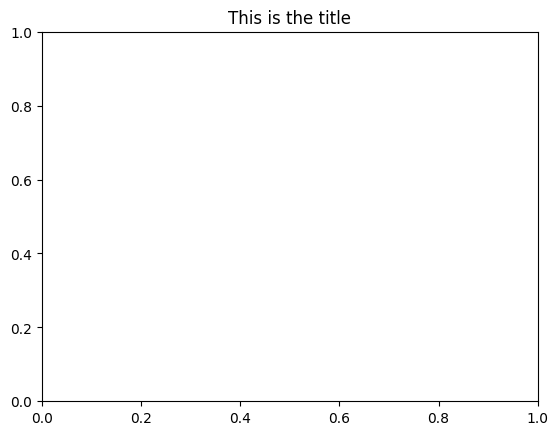

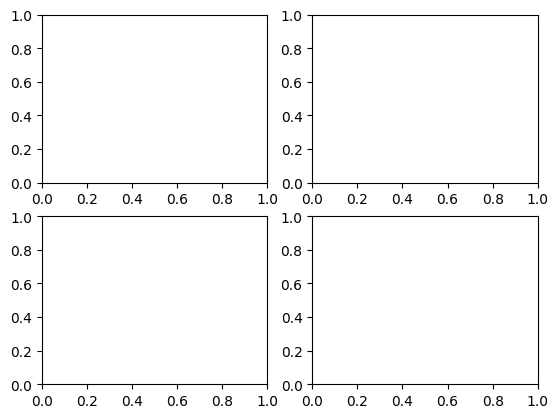

In [30]:
import matplotlib.pyplot as plt
#simple empty plot creation
fig=plt.figure()
plt.title('This is the title')
fig,ax_lst=plt.subplots(2,2)#A FIGURE WITH 2*2 GRID OF AXES
plt.show()

In [31]:
df=pd.read_csv('/content/netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [32]:
#HELPER FUNCTION-->MISSING DATA CHECK
def missing_data(data):
  missing = data.isnull().sum()
  available=data.count()
  total=(missing+available)
  percent=(data.isnull().sum()/data.isnull().count()*100).round(4)
  return pd.concat([missing,available,total,percent],axis=1, keys=['Missing','Available','Total','Percent']).sort_values(['Missing'],ascending=False)

In [33]:
missing_data(df)

,Missing,Available,Total,Percent
director,1969,4265,6234,31.5849
cast,570,5664,6234,9.1434
country,476,5758,6234,7.6355
date_added,11,6223,6234,0.1765
rating,10,6224,6234,0.1604
show_id,0,6234,6234,0.0000
type,0,6234,6234,0.0000
title,0,6234,6234,0.0000
release_year,0,6234,6234,0.0000
duration,0,6234,6234,0.0000


In [34]:
#REPLACING NA VALUES IN COLLEGE WITH NO COLLEGE
df['rating'].fillna('TBD',inplace=True)

In [35]:
#create a pivot table of date vs show counts
year=df.pivot_table(index=pd.DatetimeIndex(df['date_added']).year, values='show_id',aggfunc='count')

Line Plot

Text(0, 0.5, 'No of Shows')

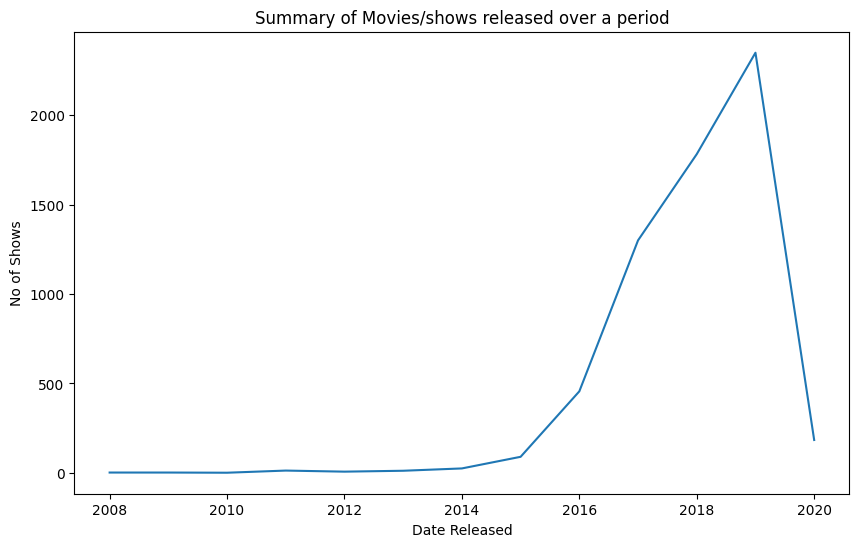

In [36]:
plt.figure(figsize=(10,6))
plt.plot(year,linestyle='solid')
plt.title("Summary of Movies/shows released over a period")
plt.xlabel("Date Released")
plt.ylabel('No of Shows')

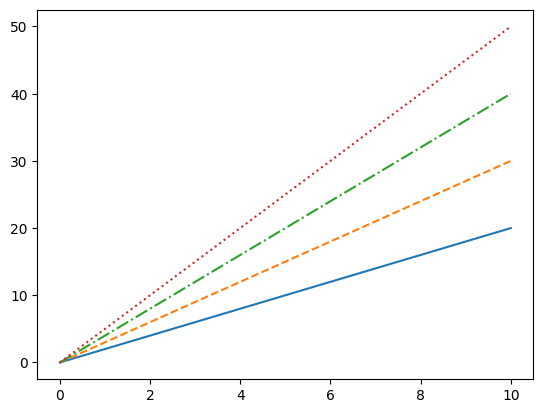

In [37]:
#Adjusting line style
x=np.linspace(0,10,1000)
plt.plot(x,x*2,linestyle='solid')
plt.plot(x,x*3,linestyle='dashed')
plt.plot(x,x*4,linestyle='dashdot')
plt.plot(x,x*5,linestyle='dotted')

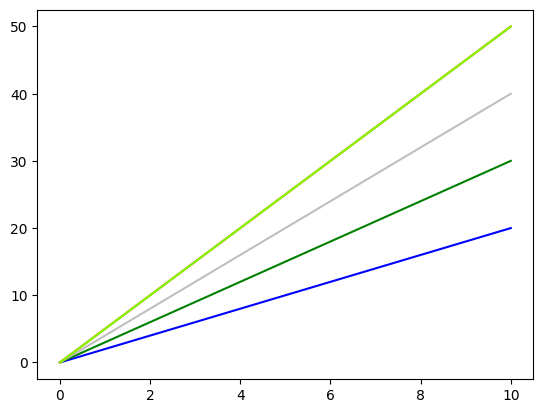

In [38]:
#Adjusting line colour
plt.plot(x,x*2, color='blue')
plt.plot(x,x*3,color='g')
plt.plot(x,x*4,color='0.75')
plt.plot(x,x*5,color='#FFDD44')
plt.plot(x,x*5,color=(1.0,0.2,0.3))
plt.plot(x,x*5,color='chartreuse')

BAR GRAPH

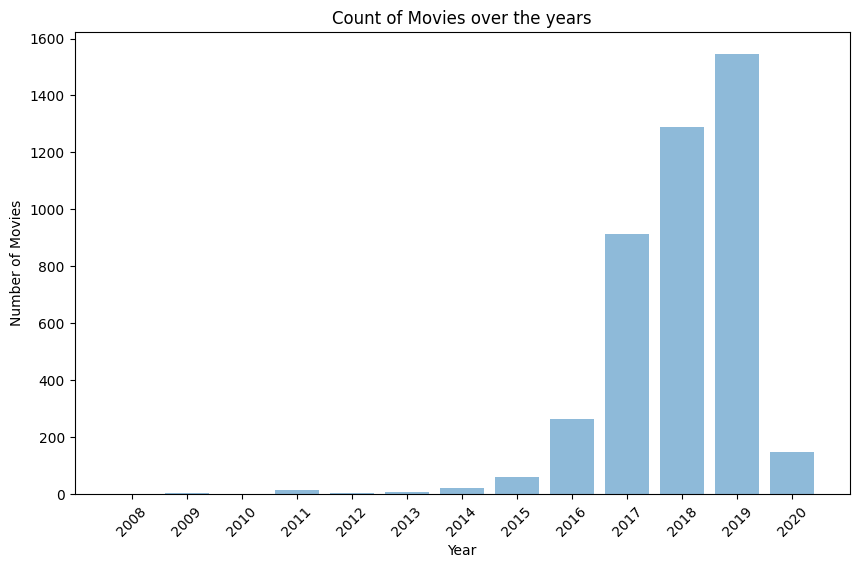

In [39]:
#CREATING A NEW DATAFRAME BY PIVOTING THE AVAILABLE DATA
new=df.pivot_table(index=pd.DatetimeIndex(df['date_added']).year, columns='type',values='show_id',aggfunc='count',fill_value=0)
flattened=pd.DataFrame(new.to_records())
#VERTICAL BAR PLOT
plt.figure(figsize=(10,6))
plt.bar(flattened['date_added'],flattened['Movie'],align='center',alpha=0.5)
plt.xticks(flattened['date_added'],rotation=45)
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.title('Count of Movies over the years')
plt.show()

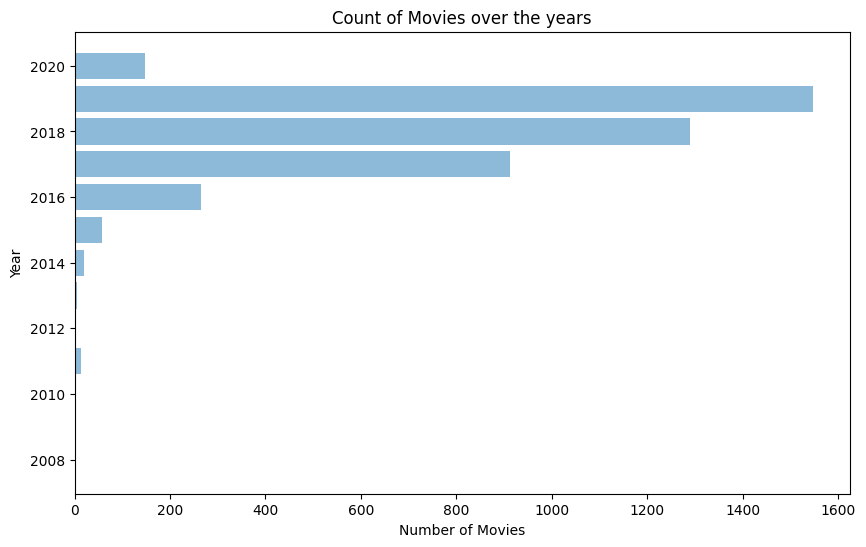

In [40]:
#HORIZONTAL BAR PLOT
plt.figure(figsize=(10,6))
plt.barh(flattened['date_added'],flattened['Movie'],align='center',alpha=0.5)
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.title('Count of Movies over the years')
plt.show()

In [41]:
flattened.head(3)

,date_added,Movie,TV Show
0,2008.0,1,1
1,2009.0,2,0
2,2010.0,1,0


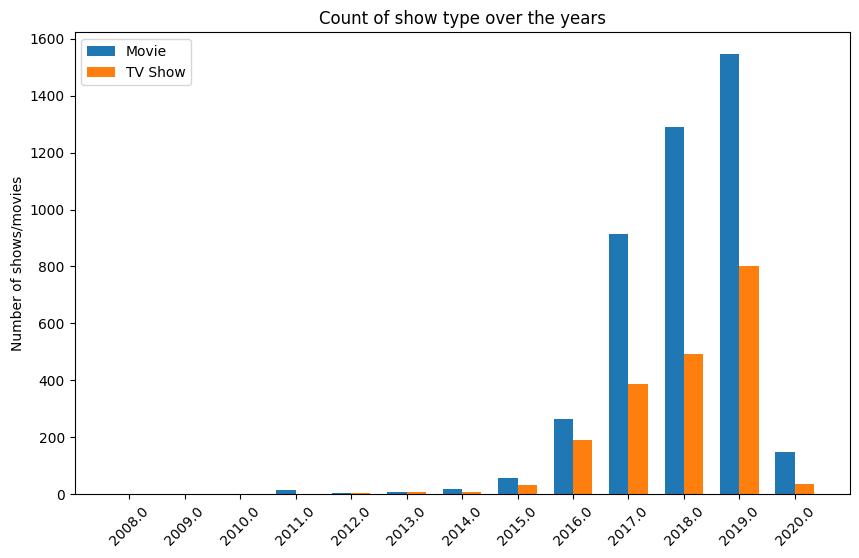

In [42]:
#BAR PLOT WITH CATEGORIES
ind=np.arange(len(flattened['date_added']))
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(ind,flattened['Movie'],width,label='Movie')
plt.bar(ind + width,flattened['TV Show'],width, label='TV Show')
plt.ylabel('Number of shows/movies')
plt.title('Count of show type over the years')
plt.xticks(ind+width/2,flattened['date_added'],rotation=45)
plt.legend(loc='best')
plt.show()

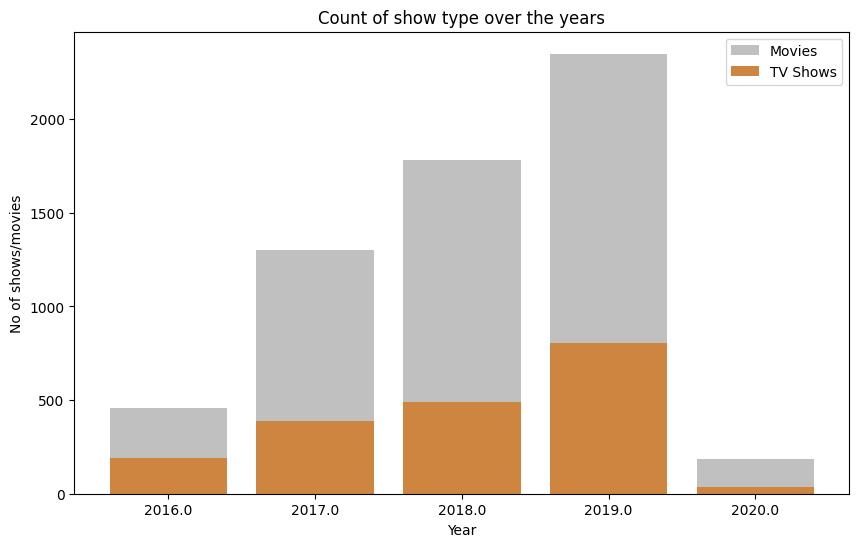

In [43]:
#STACKED BAR
new_df=flattened[flattened['date_added']>2015]
ind=[x for x , _ in enumerate(new_df['date_added'])]
plt.figure(figsize=(10,6))
plt.bar(ind, new_df['Movie'],width=0.8, label='Movies', color='silver', bottom=np.array(new_df['TV Show']))
plt.bar(ind, new_df['TV Show'],width=0.8, label='TV Shows', color='#CD853F')
plt.xticks(ind, new_df['date_added'])
plt.ylabel("No of shows/movies")
plt.xlabel("Year")
plt.legend(loc="upper right")
plt.title("Count of show type over the years")
plt.show()

PIE CHART

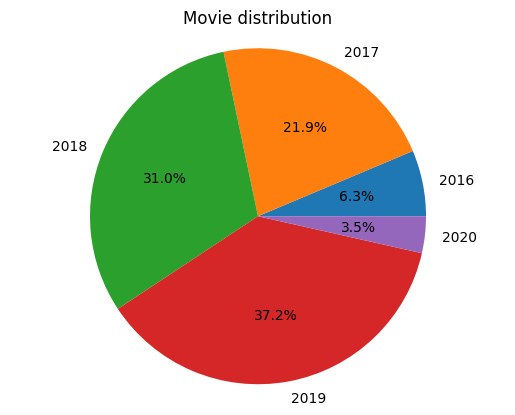

In [44]:
my_labels='2016', '2017', '2018', '2019', '2020'
plt.pie(new_df['Movie'],labels=my_labels, autopct='%1.1f%%')
plt.title('Movie distribution')
plt.axis('equal')
plt.show()

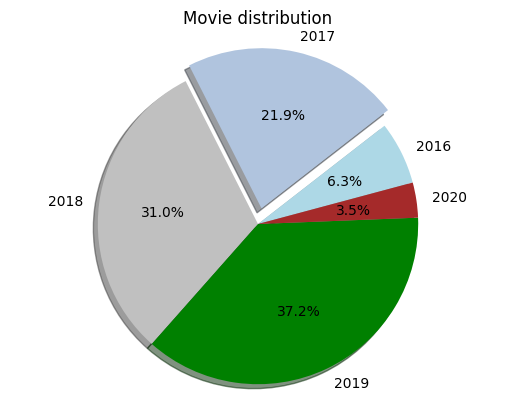

In [45]:
my_colors=['lightblue','lightsteelblue','silver','green','brown']
my_explode=(0,0.1,0,0,0)
plt.pie(new_df['Movie'],labels=my_labels, autopct='%1.1f%%', startangle=15, shadow=True, colors=my_colors, explode=my_explode)
plt.title('Movie distribution')
plt.axis('equal')
plt.show()

SCATTER PLOT

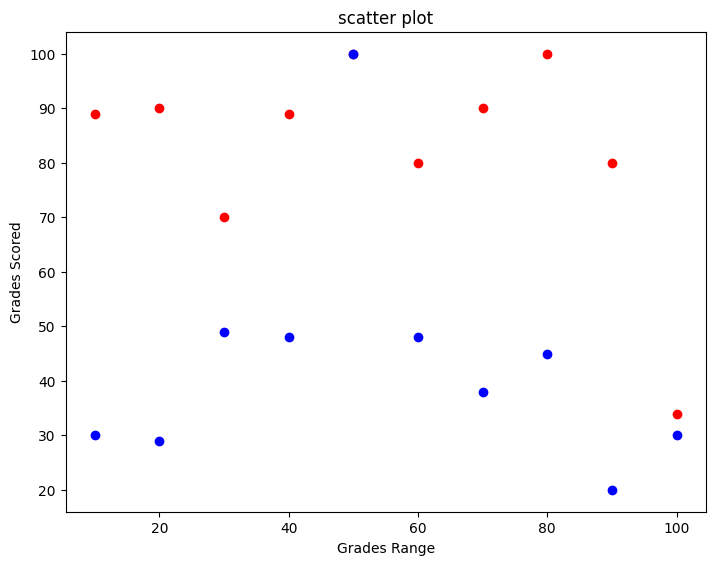

In [46]:
girls_grades=[89,90,70,89,100,80,90,100,80,34]
boys_grades=[30,29,49,48,100,48,38,45,20,30]
grades_range=[10,20,30,40,50,60,70,80,90,100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range,boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

BOX PLOT

In [47]:
df['duration']=df['duration'].str.extract('(\d+)').astype(int)
df2=df[['duration','type']]

In [48]:
df2=df2.loc[df['type']=='Movie']

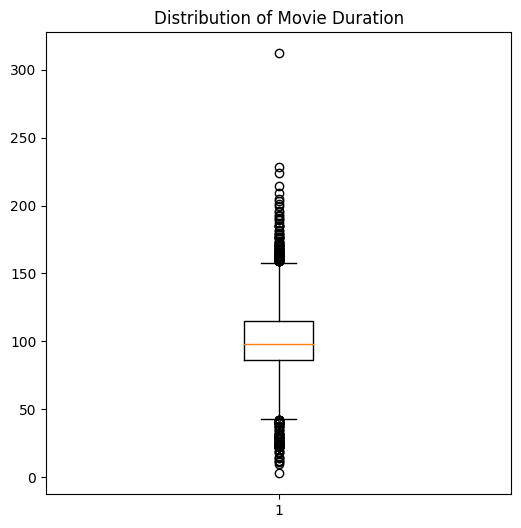

In [49]:
plt.figure(figsize=(6,6))
plt.boxplot(df2['duration'])
plt.title('Distribution of Movie Duration')
plt.show()

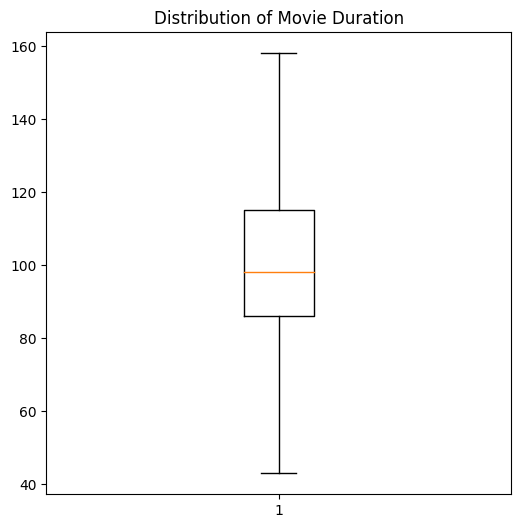

In [50]:
##WITHOUT OUTLIERS
plt.figure(figsize=(6,6))
plt.boxplot(df2['duration'],showfliers= False)
plt.title('Distribution of Movie Duration')
plt.show()